### All notes here, including images, were taken from Pacheco's(2022) Introduction to Parallel Programming

# Chapter 1

## Concepts

**Serial Program:** a program that runs only one instruction at each step. 

**Parallel Program:** a program capable of running more than one instruction simultaneously at each step, with each instruction being run by an independent processing unit. Sometimes, dividing the workload of a serial program is not enough to increase its performance significantly. Thus, we must remodel the program and devise a **parallel algorithm** for it.

**Task-Parallelism:** divide tasks needed to solve a problem among the **core**(processing unit). Same data, different instructions.

**Data-Parallelism:** each **core** executes the same or very similar instructions, but they do so over different data(parts of the input needed to solve a problem). Same(similar) instructions, different data.

But it is **not** true that cores' work will be independent from each other for all problems. On some problems, for a core to proceed with its work, it might need data provided by another core. Even when that is not the case, a core might need to wait for its turn to operate. I.e., we need to plan their **coordination**.

**Communication:** data sharing among cores.

**Load Balancing:** each core's work share.

**Synchronization:** start/stop cores when needed. Planning their pacing, i.e., the moments in which they run their tasks, and preventing them from proceeding when they do not have data or when another core needs its current data.

**Classification Of Parallel Systems:** based on access to **memory** and operation **independence**.

**Memory:**

1. **Shared-Memory Systems:** single memory to store data used by all cores. Coordination through inspection and updating of shared memory.

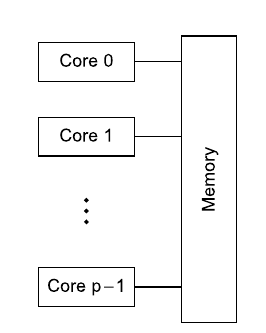

2. **Distributed-Memory Systems:** each core has its own private memory. Coordination through communication between cores over a network.

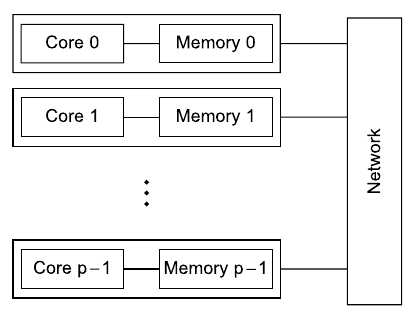

**Data/Instruction Streams Independence:**

1. **Multiple-Instruction Multiple-Data(MIMD):** cores have their own data and instruction streams.
2. **Single-Instruction Multiple-Data(SIMD):** cores apply the same instruction over different data. If two cores need to execute different instructions, one idles while the other runs.

# Chapter 2

## Concepts

**Serial Hardware/Software:** runs a single job at a time.

**Von Neumann Architecture:** consists of the following

1. **Main Memory:** locations for the storage of data or instructions. Locations have their own **addresses** and **contents**. From address to location, in location, contents, either data or instruction.
   
2. **Central Processing Unit:** divided into **control unit**, **data-path**, and **registers**.

* Registers: stores information about the state of a program. This storage is faster than main memory and secondary storages(HDD, SSD, etc.), and is exclusive to the CPU.
* Control Unit: decides which instructions should be executed.
  * Program Counter: a special register, stores the _address_ of the next instruction.
* Data-Path: runs the instructions.

3. **Interconnection(Bus):** channel through which data and instructions are exchanged between memory and cpu. Channel capacity determines the **Von Neumann Bottleneck**, i.e., the rate of information exchange between the components. Why is this important? Because cpus works faster than they can get data from memory.

**Multitasking:** slice an interval of time and assign the execution of one program to a slice. Switch between programs according to some rule, e.g., switch to program B whenever program A needs a resource that is not yet available, i.e., when A is _blocked_. Programs can be assigned to **threads**, which will handle programs as different, independent, tasks. A _process_( the master thread ) coordinates programs. Whenever a thread starts, it **forks** from the master. When it finishes its job, it is **joined** back to the master.

To handle problems and limitations of the Von Neumann Architecture, some modifications were proposed. Most of them target the bottleneck.

**Cache:** memory locations, usually (physically)near the cpu, that are easier to access. How to decide what goes into it? A common heuristic to handle this problem is the principle of **locality**, i.e., programs _tend_ to use data and instructions stored in physical locations that are near the locations of data and instructions that it used recently. I.e., logically dependent and temporally close data and instructions are stored near to each other. Thus, keep in cache things that are used more frequently.

**Cache Blocks:** remember the interconnection? Instead of flooding it with _individual/single_ instructions/data, use it to communicate **blocks** of instructions/data, which are called **cache blocks/lines**. This means fetching instructions/data from _multiple_ locations in memory at once.

 * When buying processors, have you ever seen **L1, L2, L3** caches on the specs? These are the cache **levels**, where lower numbered levels are smallest and fastest.

**Cache Hit and Miss:** check the cache for information, if the information is there, call it a **cache hit**, else, call it a **cache miss**.

**Inconsistency:** updates/replacement of data in cache( **evictions** ) that are _not_ followed by an update of the same/respective data on _memory_. Two common approaches to handle inconsistency are:

  * Evictions are mostly based on the **least recently used** approach.

1. **Write-Through:** write to cache, update memory immediately.
2. **Write-Back:** write to cache, mark it as **dirty**. When re-updating cache, write the _dirty_ line to _memory.

Now, how to decide _where_ in the cache to store information?

**Fully Associative:** no restrictions over where a block can be placed.

**Direct Mapped:** each block is mapped to a determined, unique location in cache.

**N-Way Set Associative:** set a fixed number N of locations in cache. Blocks can be placed in any of these N locations.

But... caches are expensive and frequently not large enough. Main memory might also not be enough to store data and instructions from large programs. To handle that, we have **Virtual Memory**.

**Virtual Memory:** definitely not easy, but let's go.

  For any fixed system S, we have a finite, fixed amount of memory M at a time T. The problem is: we want as many programs running, simultaneously or not, on an interval of time I. But, as either the amount of programs or their sizes grow, M might not bet enough to store the data and instructions to continuously execute the intended number of programs during I. Thus, we need to manage(assign/reassign) M in such a way that the programs keep running. How to do so?

  We might be tempted to assign physical memory addresses at compile time. But why is this not a good solution? Just assume we know exactly how much memory we need beforehand. During runtime, all instructions and data for our program would be restricted to the assigned blocks of memory. What if other programs need to use these blocks?
  
  Well, cannot we just compile them to use other addresses? No, because even if that was possible, it would result in the problem described on the first paragraph. But, we simply cannot program everything. Thus, we must consider the case that other programs might need to use these addresses. If they are allowed to used, we will have two possible problems: they will either leave existing data in an invalid state, and the existing program will crash, or... data will be left in an invalid state, but the previous program will keep running with undefined behavior. Thus, manually setting addresses is a no-go. We need to **reuse** our M addresses **without** causing undefined behavior/crashes **whilst** keeping the maximum amount of programs running during I.

  Virtual Memory does that. First, remember that M is limited, and to handle this only active parts of the programs are kept in memory. This means that some information must be stored elsewhere, in a secondary storage, that is called **swap space**. Why not run everything from this space, then? Slow.As.F*ck. Latency would skyrocket if we were to do so. So, to avoid the amount of accesses to the swap space, virtual memory operates on blocks of data/instructions called **pages**.
  
  Well, as per the paragraph the third paragraph, we cannot assign M directly to these pages. Instead, at compile time, **virtual page numbers** are assigned to these pages. At **runtime**, a **page table** is created, mapping, but not immediately loading, these virtual page numbers to physical addresses. Whenever a set of data/instructions are requested during the program's runtime, the page table is consulted to translate the virtual address of the requested page into the physical addresses it was assigned to. Only then this page is loaded to memory. When this page is not needed anymore, or when the program ends, the physical addresses are freed so other programs can use it.

  TL;DR: virtual memory is a way of managing main memory usage.

**Instruction-Level Parallelism(fine-grained):** instructions executed simultaneously by multiple processors/functional units. Two approaches:

1. **Pipelining:** let $k \in \mathbf{N}$ and P be a program that can be divided in $(p_1, ..., p_k)$ parts to be executed in sequence. With pipelining, each part $p_i$, with $1 \leq i \leq k$, can be run by a different processor/functional unit. E.g.: as $p_2$ gets and starts working on data from $p_1$, the latter gets and processes new data, i.e., both $p_1$ and $p_2$ operate simultaneously. This can reduce the total amount of time by a fraction that is proportional to the amount of processors/functional units. But keep in mind the **sequential** nature of pipelining. Think about it as if pipelining were a form of **composition of functions**.

  Note: I do not know if pipelining is MISD or MIMD.

2. **Multiple Issue:** here, each processor/functional unit simultaneously execute a different instruction. Differently from pipelining, there is no **dependency** between the instructions, i.e., for $i, j \in \mathbf{N}$ with $i = j - 1$, $unit_j$ does not require data from $unit_i$ to operate. There are **two** types of multiple issue systems:

   * **Static:** scheduling of functional units happens at **compile** time.
   * **Dynamic:** scheduling of functional units happens at run-time, meaning that there is no need for the instructions to be ordered(this is uncommon, though). These systems are called **Superscalar**.

With multiple issue, there MUST be instructions that can be execute simultaneously. One way of finding such instructions is a technique called **Speculation**, where the compiler/processor takes a guess about an instruction and then operates according to this guess. But this technique **requires** a defined behavior to handle cases where the guess was **wrong**.

**Thread-Level Parallelism:** parallelism via simultaneous execution of multiple threads. "Program-level" parallelism, instead of "instruction-level".

**Hardware Multithreading:** a form of **Thread-Level Parallelism(coarse-grained)**. Switches between threads $T_1$ and $T_2$ whenever any of them stalls when waiting for an operation to complete. Suppose that a thread switch happens if the stall time $P$ is greater than a fixed minimum interval of time $A$. The disadvantage of this form of multithread is that, if $P$ is too **big** and $P < A$, the processor will not switch from the current thread and will be idled for $A - P$ time. 

**Simultaneous Multithreading:** "fine-grained" multithreading, requires **superscalar** processors. Multiple threads using multiple functional units.

**Flynn's Taxonomy:** a classification of parallel computers. It uses two criteria: number **instruction streams** and number of **data streams** a computer can manage.

1. **Single Instruction Single Data Stream(SISD):** executes one instruction, and computes a single data value at a time.
   
2. **Single Instruction Multiple Data Stream(SIMD):** applies the **same**(a single) instruction on **multiple data items** from different data streams. I.e., a single control unit and multiple datapaths. For a given datapath $D$ and an instruction $M$, either $D$ applies $M$ or it **idles**. In other words, individual datapaths **cannot** apply instructions that are not the ones broadcast by the control unit. If a current instruction is **not** to be applied on current data on $D$, the latter has to idle until a valid instruction is broadcast. This behavior can degrade systems performance, but it has the advantage of being easier to program, since its behavior is simple. Useful for **data-parallelism**, i.e., dividing data among processors and letting each of the latter apply similar instructions to their subsets of data. It shines on large data, parallel problems.

  Thought about GPU programming, did you not? NVidia's CUDA uses **SIMT**, i.e., Single Instruction Multiple **Threads**(https://docs.nvidia.com/cuda/cuda-c-programming-guide/index.html#asynchronous-simt-programming-model). But the author stresses that GPUs are not purely SIMD, since they can execute multiple instructions, even though they are not purely MIMD either.
  
  * **Vector Processors:** operates on **vectors** of data, instead of **scalars**(single elements). They have the following characteristics:

    1. Vector Registers: stores vectors of operands. A functional unit can operate **simultaneously** on all contents of the operands.
    2. Vectorized and Pipelined Functional Units: apply the **same** operation to the elements of either a single or a pair of vectors.
    3. Vector Instructions
    4. Interleaved Memory: multiple addresses(or banks) can be accessed **independently**. I.e., we have $d_1, ..., d_k$ elements, $m_1, ..., m_k$ addresses/banks, and $f: elements \rightarrow addresses$ s.t., for $1 \leq i \leq k$, $f(i) := store(d_i, m_i)$, i.e., store ith element on ith memory address. Thus, a vector $V$ s.t. $||V|| = k$ can load/store $k$ elements in a single step.
    5. Strided Memory Access And Hardware Scatter/Gather
       1. Access: let $k \in \mathbf{Z^{+}} \cup \{0\}$ and $V[i]$ be the ith element in V. Strided access allows the program to access the $V[i + k]$ elements of V, i.e., access elements of a vector separated by **fixed** intervals.
       2. Scatter/Gather: allows for writing(scatter) or reading(gather) elements of a vector separated by **irregular** intervals.

    They(vector systems) require high memory bandwidth, and guarantee that, if its loaded, it is used. But irregular data structures are not fit for it. Its scalability is also limited.

1. **Multiple Instruction Multiple Data(MIMD):** 